## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Dec 15 13:56:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Donwlooad Video

In [3]:
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1fpU_2yHFA4cmPYmkNmKYq7JZ4Acmu0wh' -O your_actual_filename.ext

In [4]:
!pip install gdown -U -q  # Upgrade gdown for reliability
!gdown 1osUdtT6TDCyA9NZpLcpnWewcuwUAss8d -O /content/1div4-videojalanraya4.mp4

Downloading...
From (original): https://drive.google.com/uc?id=1osUdtT6TDCyA9NZpLcpnWewcuwUAss8d
From (redirected): https://drive.google.com/uc?id=1osUdtT6TDCyA9NZpLcpnWewcuwUAss8d&confirm=t&uuid=ede66286-e4db-4e0b-808b-bdd473c1f1be
To: /content/1div4-videojalanraya4.mp4
100% 267M/267M [00:02<00:00, 131MB/s]


In [5]:
!ls /content

 1div4-videojalanraya4.mp4   ByteTrack	'track&count-result.mp4'
 best.pt		     runs


In [6]:
SOURCE_VIDEO_PATH = f"{HOME}/1div4-videojalanraya4.mp4"

In [7]:
# stop

## Install YOLOv8

In [8]:
# !pip install ultralytics==8.3.19
!pip install -U ultralytics #newer version

# prevent ultralytics from tracking your activity
# !yolo settings sync=False

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.2/112.6 GB disk)


# Installl ByteTrack

In [9]:
!pip install -q loguru
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -q -r requirements.txt
!cd ByteTrack && python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()

import sys
sys.path.append(f"{HOME}/ByteTrack")
import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [10]:
!pip install lap -q
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

## Install Roboflow Supervision

In [11]:
!pip install supervision==0.24.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.24.0


In [12]:
# from supervision.assets import download_assets, VideoAssets

# SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)

## Load pre-trained YOLOv8 model

In [13]:
# settings
# MODEL = "yolov9x.pt" to much vram taken so collab will dc
MODEL = ("best.pt")

In [14]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

YOLO12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs


## Predict and annotate single frame

In [15]:
ls/content

 1div4-videojalanraya4.mp4   ByteTrack/  'track&count-result.mp4'
 best.pt                     runs/


In [16]:
%cd /content

!yolo task=detect \
    mode=track \
    model=best.pt \
    source="/content/1div4-videojalanraya4.mp4" \
    tracker="bytetrack.yaml" \
    project=/content/runs \
    name=yolo12s_vehicle_tracking

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 2710/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 14.4ms
video 1/1 (frame 2711/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 16.8ms
video 1/1 (frame 2712/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 16.3ms
video 1/1 (frame 2713/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 13.3ms
video 1/1 (frame 2714/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 14.7ms
video 1/1 (frame 2715/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 13.4ms
video 1/1 (frame 2716/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 14.4ms
video 1/1 (frame 2717/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 15.9ms
video 1/1 (frame 2718/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 14.5ms
video 1/1 (frame 2719/7706) /content/1div4-videojalanraya4.mp4: 384x640 1 Motorcycle, 13.6ms
video 1/1 (frame 27

## Fase 2

In [17]:
!pip install supervision==0.24.0
# !pip install -U supervision


In [18]:
import supervision as sv

generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)
results = model(frame)[0]
print(results.boxes.conf)


0: 384x640 3 Motorcycles, 2 cars, 179.9ms
Speed: 8.6ms preprocess, 179.9ms inference, 46.8ms postprocess per image at shape (1, 3, 384, 640)
tensor([0.9154, 0.9125, 0.9033, 0.8780, 0.5028], device='cuda:0')


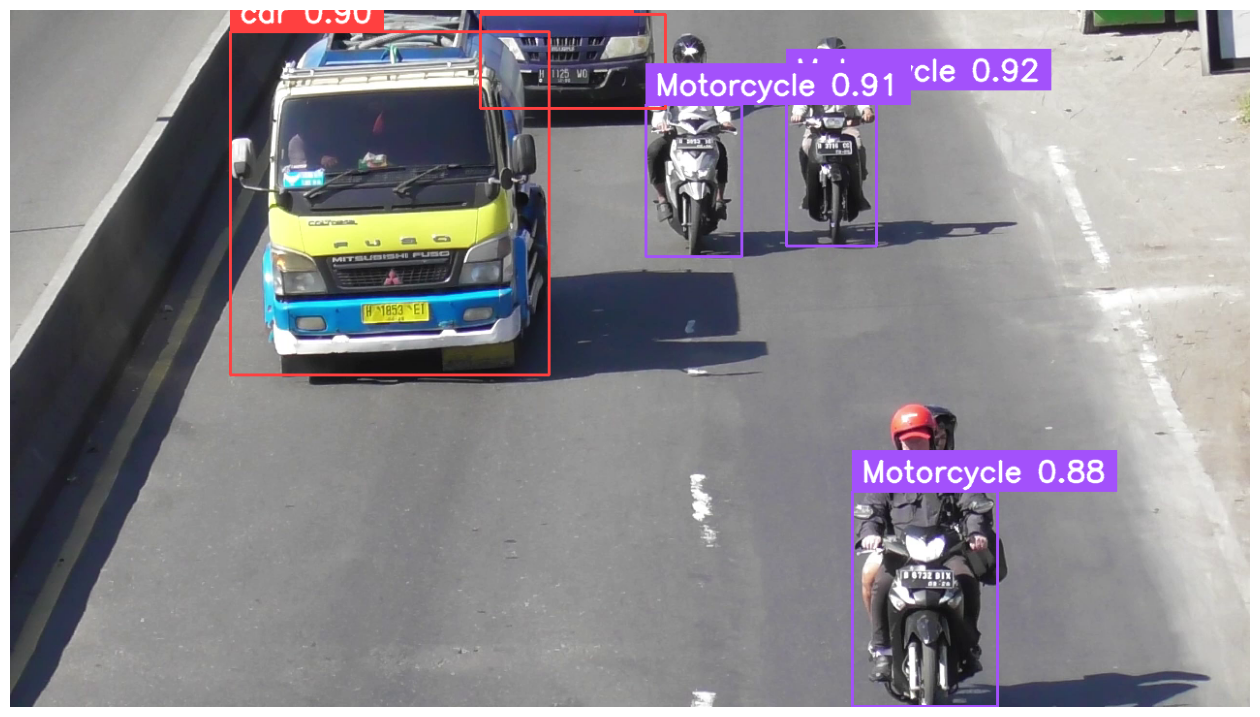

In [19]:
from supervision.detection.core import Detections

detections = Detections(
    xyxy=results.boxes.xyxy.cpu().numpy(),
    confidence=results.boxes.conf.cpu().numpy(),
    class_id=results.boxes.cls.cpu().numpy().astype(int)
)
labels = [
    f"{results.names[int(class_id)]} {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]

box_annotator = sv.BoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1)

detections = sv.Detections.from_ultralytics(results)
annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame,detections=detections, labels=labels)
sv.plot_image(image=annotated_frame, size=(16, 16))

In [20]:
# import supervision as sv
# from supervision.video.dataclasses import VideoInfo

VideoInfo = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

print(VideoInfo)

VideoInfo(width=1280, height=720, fps=30, total_frames=7706)


In [21]:
CLASS_NAMES_DICT = model.model.names

In [22]:
TARGET_VIDEO_PATH = "/content/track&count-result.mp4"

In [23]:
ls

 1div4-videojalanraya4.mp4   ByteTrack/  'track&count-result.mp4'
 best.pt                     runs/


In [24]:
from supervision.geometry.core import Point

LINE_START = Point(50,650)
LINE_END = Point(1300-50, 650)

In [25]:
ls

 1div4-videojalanraya4.mp4   ByteTrack/  'track&count-result.mp4'
 best.pt                     runs/


In [26]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [35]:
from tqdm.notebook import tqdm
import supervision as sv

byte_tracker = sv.ByteTrack()

generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

box_annotator = sv.BoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1)
line_annotator = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1)
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

TEST_FRAMES = 400

with sv.VideoSink(TARGET_VIDEO_PATH, video_info=VideoInfo) as sink:
    for i, frame in enumerate(tqdm(generator, total=VideoInfo.total_frames)):
        if i >= TEST_FRAMES:
            break

        results = model(frame)[0]
        detections = sv.Detections.from_ultralytics(results)

        detections = detections[detections.confidence > 0.2]

        detections = byte_tracker.update_with_detections(detections)

        labels = [
            f"#{tracker_id} {results.names[int(class_id)]} {confidence:.2f}"
            for class_id, tracker_id, confidence in zip(
                detections.class_id, detections.tracker_id, detections.confidence
            )
            if tracker_id is not None
        ]

        annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

        line_zone.trigger(detections=detections)
        annotated_frame = line_annotator.annotate(frame=annotated_frame, line_counter=line_zone)

        sink.write_frame(annotated_frame)

  0%|          | 0/7706 [00:00<?, ?it/s]


0: 384x640 3 Motorcycles, 2 cars, 18.2ms
Speed: 3.0ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 17.0ms
Speed: 3.6ms preprocess, 17.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 24.3ms
Speed: 3.3ms preprocess, 24.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 17.4ms
Speed: 2.5ms preprocess, 17.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 2 cars, 14.7ms
Speed: 3.4ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Motorcycles, 

In [ ]:
# from tqdm.notebook import tqdm
# # from supervision.tools.line_counter import LineZone, LineZoneAnnotator  # updated import
# import supervision as sv

# byte_tracker = BYTETracker(BYTETrackerArgs())

# generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# box_annotator = sv.BoxAnnotator(thickness=2)

# label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1)

# line_annotator = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1)

# line_counter = sv.LineZone(start=LINE_START, end=LINE_END)  # now LineZone instead of LineCounter

# # TEST MODE: Only process first N frames for quick testing
# TEST_FRAMES = 300  # Change this number: 150 = ~5 sec, 300 = ~10 sec, 600 = ~20 sec

# with sv.VideoSink(TARGET_VIDEO_PATH, video_info=VideoInfo) as sink:
#     for i, frame in enumerate(tqdm(generator, total=VideoInfo.total_frames)):
#         if i >= TEST_FRAMES:  # Stop after this many frames
#             break

#         results = model(frame)[0]
#         detections = sv.Detections.from_ultralytics(results)
#         labels = [
#             f"{tracker_id} {results.names[int(class_id)]} {confidence:.2f}"
#             for class_id,tracker_id, confidence in zip(detections.class_id, detections.confidence, detections.tracker_id)
#         ]

#         tracks = byte_tracker.update(
#             output_results=detections2boxes(detections=detections),
#             img_info=frame.shape,
#             img_size=frame.shape
#         )
#         tracker_id = match_detections_with_tracks(detections=detections),
#         detections.tracker_id = np.array(tracker_id)

#         annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)
#         annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

#         line_counter.trigger(detections=detections)
#         line_annotator.annotate(frame=annotated_frame, line_counter=line_counter)

#         sink.write_frame(annotated_frame)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')